# COMP809 - Lab 6

In [125]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import resample

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

## Question 1 

### Question 1 (a)

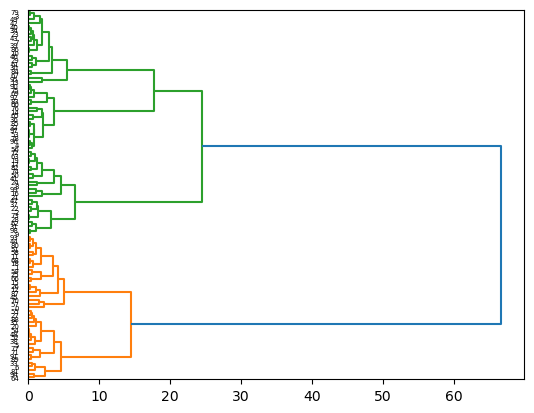

In [126]:
# Generating the sample data from make_blobs
# This particular setting has 100 data records, 2 features and 5 clusters. For more details:

X2, y2 = make_blobs(n_samples=100,  # total number of points equally divided among clusters 
                 n_features=2,      # number of features for each sample.
                 centers=5,         # number of centers to generate, or the fixed center locations.
                 cluster_std=1,     # standard deviation of the clusters.
                 shuffle=True,
                 random_state=1)#For reproducibility.Constant random_state means it is not real random

# For more information about the make_blobs function, visit
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

z = linkage(X2, method="ward")
p = dendrogram(z, orientation = "right")
plt.show()

# The highest distance is between approximately 24 and 65.
# So, it seems that the data can be classified in 2 groups.

### Question 1 (b)

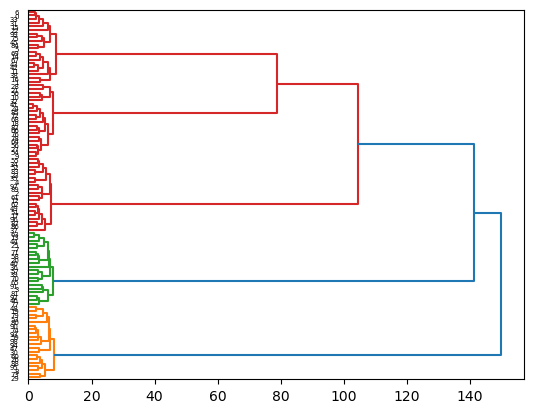

In [127]:
X10, y10 = make_blobs(n_samples=100,
                  n_features=10,
                  centers=5,
                  cluster_std=1,
                  shuffle=True,
                  random_state=1)  

z = linkage(X10, method="ward")
p = dendrogram(z, orientation = "right")
plt.show()

# The highest distance is between approximately 7 and 75.
# So, it seems that the data can be classified in 5 groups.

### Question 1 (c)

In [ ]:
# If we increase the number of features with relevant information about the clusters, 
# it seems that the probability of infering the correct number of clusters increases.

### Question 1 (d)

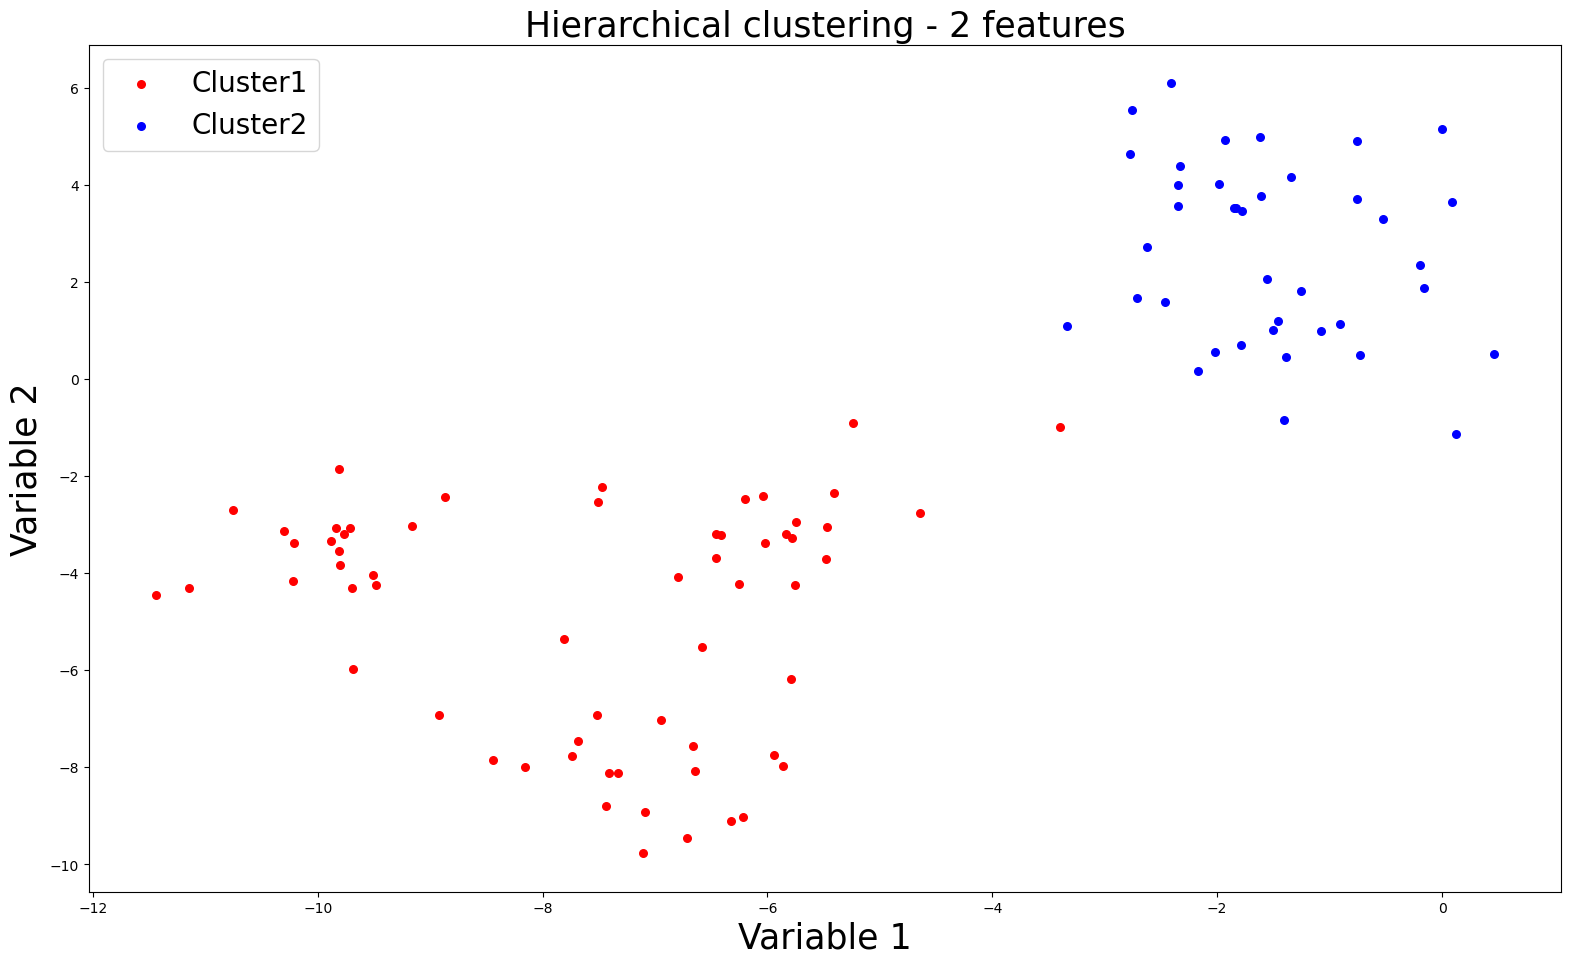

Variability explained by first 2 PCs:  0.71


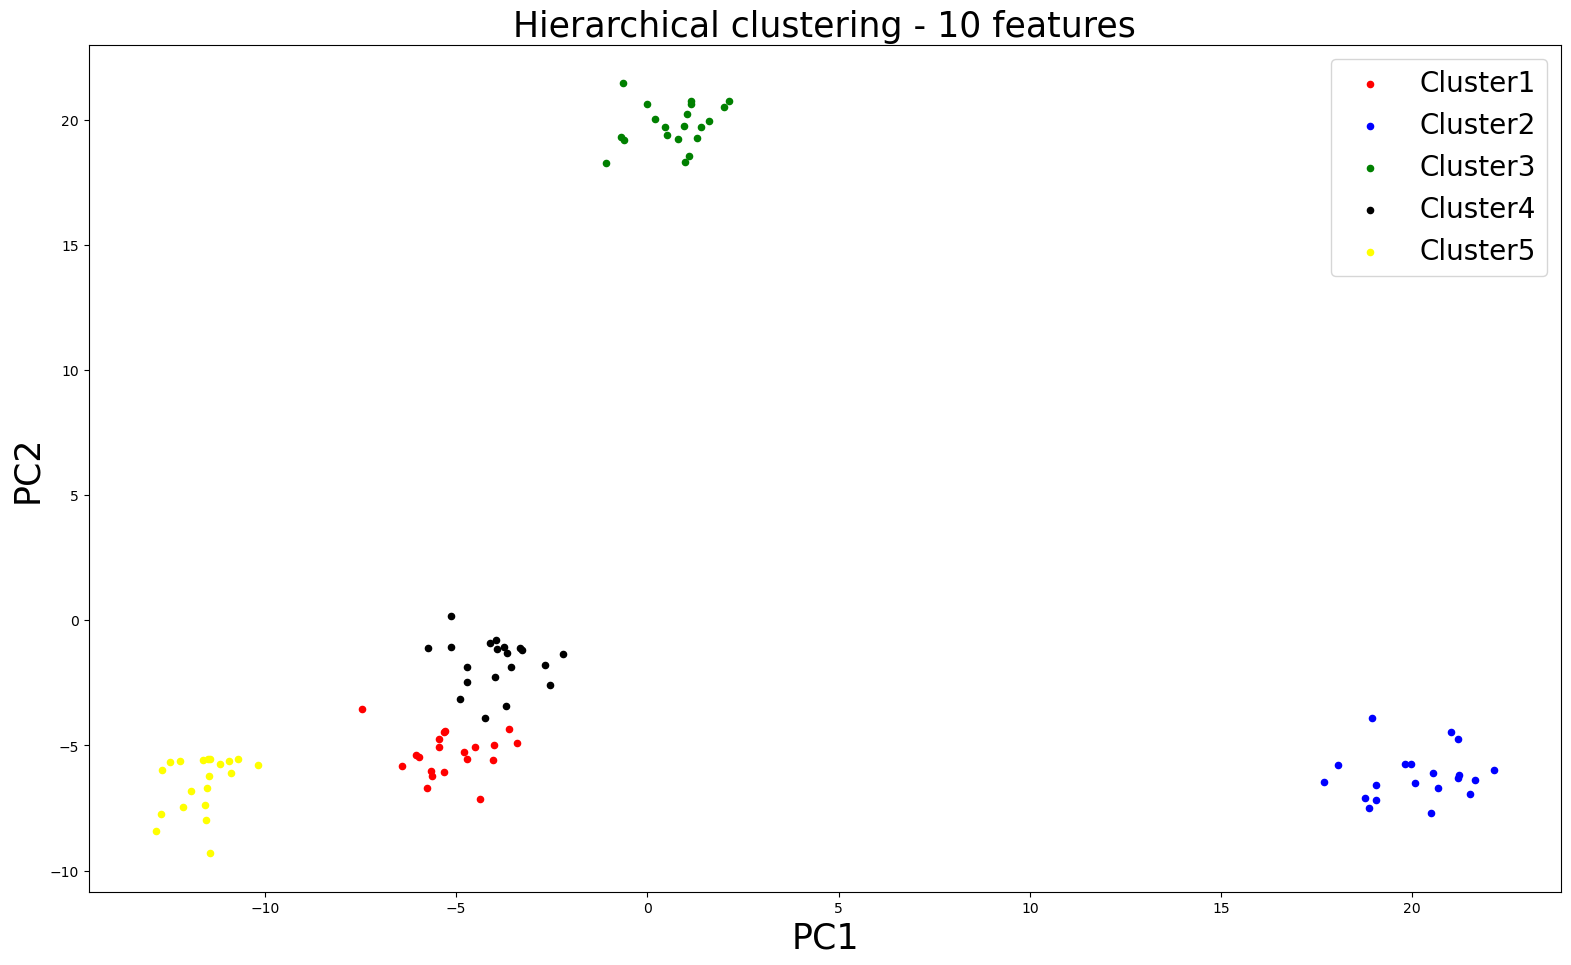

In [128]:
### For the case we have 2 features, we proposed K=2 ###

model2 = AgglomerativeClustering(n_clusters=2, linkage="ward", compute_distances = True);
model2.fit(X2);
clusters2 = model2.labels_;

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(X2[clusters2 == 0, 0], X2[clusters2 == 0, 1], s=30, c="red", label = "Cluster1");
plt.scatter(X2[clusters2 == 1, 0], X2[clusters2 == 1, 1], s=30, c="blue", label = "Cluster2");
plt.xlabel("Variable 1", fontsize = 25);
plt.ylabel("Variable 2", fontsize = 25);
ax.set_title("Hierarchical clustering - 2 features", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

# The 2 clusters are well defined.  It seems to represent quite well the cluster structure.

### For the case we have 10 features, we proposed 5 clusters ###

model10 = AgglomerativeClustering(n_clusters=5, linkage="ward", compute_distances = True);
model10.fit(X10);
clusters10 = model10.labels_;

# Since we cannot plot 10 variables simultaneously, we reduce the dimension of the data set through PCAs.
pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X10);
print("Variability explained by first 2 PCs: ", round(np.sum(pca.explained_variance_ratio_),2))
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[clusters10 == 0, 0], PCs.iloc[clusters10 == 0, 1], s=20, c="red", label = "Cluster1");
plt.scatter(PCs.iloc[clusters10 == 1, 0], PCs.iloc[clusters10 == 1, 1], s=20, c="blue", label = "Cluster2");
plt.scatter(PCs.iloc[clusters10 == 2, 0], PCs.iloc[clusters10 == 2, 1], s=20, c="green", label = "Cluster3");
plt.scatter(PCs.iloc[clusters10 == 3, 0], PCs.iloc[clusters10 == 3, 1], s=20, c="black", label = "Cluster4");
plt.scatter(PCs.iloc[clusters10 == 4, 0], PCs.iloc[clusters10 == 4, 1], s=20, c="yellow", label = "Cluster5");
plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("Hierarchical clustering - 10 features", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

# The first 2 principal components explains 71% of the variability of the data.
# The 5 cluster are well defined in the PC1 and PC2 scatter plot.


## Question 2

### Question 2 (a)

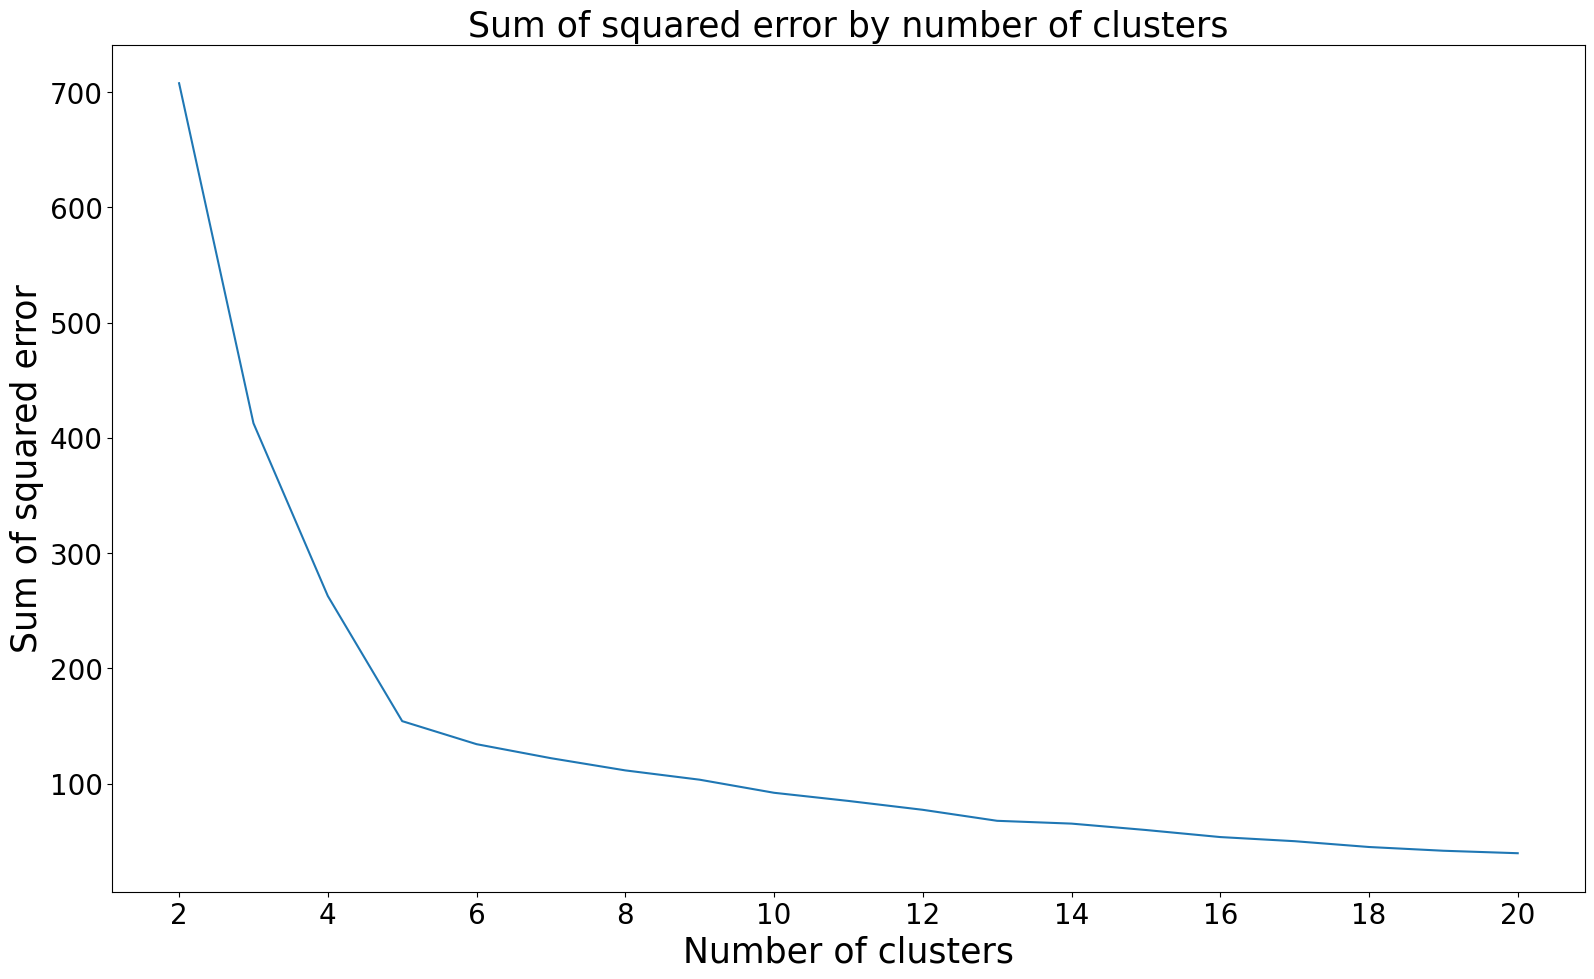

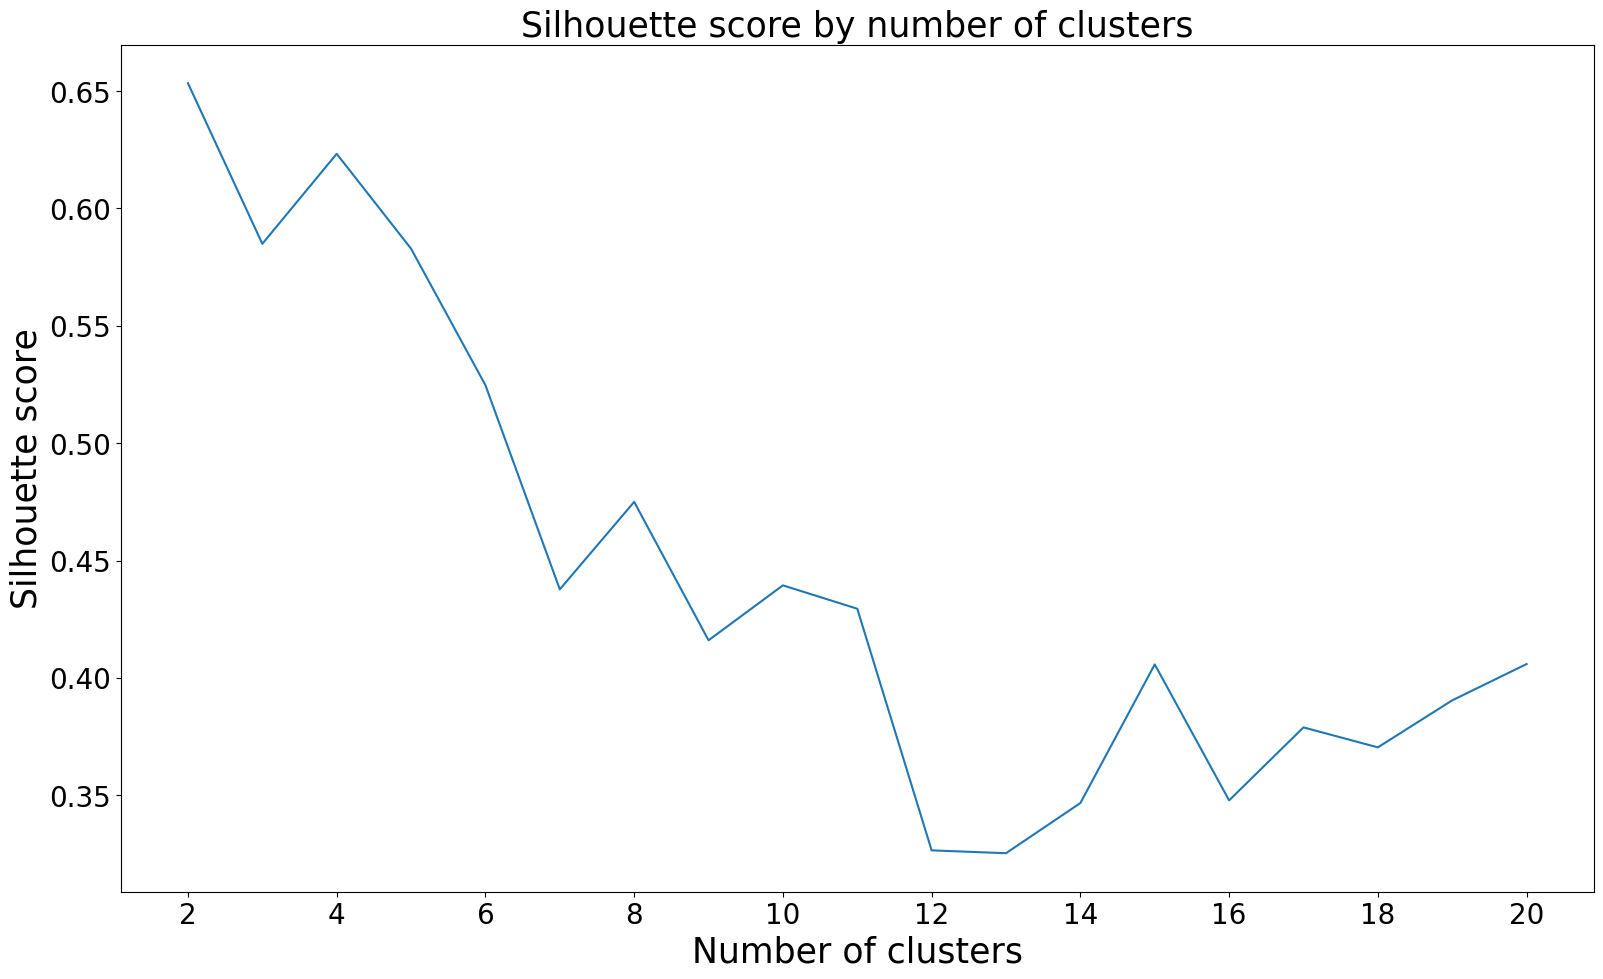

In [91]:
def wcss(x, kmax):
    wcss_s = []
    for k in range(2, kmax + 1):
        kmeans = KMeans(n_clusters = k);
        kmeans.fit(x);
        wcss_s.append(kmeans.inertia_);# distances of samples to closest cluster center
    return wcss_s

# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
kmax = 20; # maximum number of clusters
ax.plot(range(2, kmax + 1), wcss(X2, kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Sum of squared error", fontsize = 25);
ax.set_title("Sum of squared error by number of clusters", fontsize = 25);
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # to force intergers in x-axis
plt.show();

def Silhouette(x, kmax):
    sil = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(x)
        sil.append(silhouette_score(x, kmeans.labels_, metric = "euclidean"))
    return sil

# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
ax.plot(range(2,kmax+1) , Silhouette(X2,kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Silhouette score", fontsize = 25);
ax.set_title("Silhouette score by number of clusters", fontsize = 25);
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # to force intergers in x-axis
plt.show();


# In the SSE plot, the elbow point can be clearly identified at K=5.

# The silhouette score favours K=2, followed by K=4.
# The true value, K=5, is one of the candidates, since there is not much difference
# in comparison to the optimal value.

# Taking into account both criteria, we can propose K=4.


### Question 2 (b)

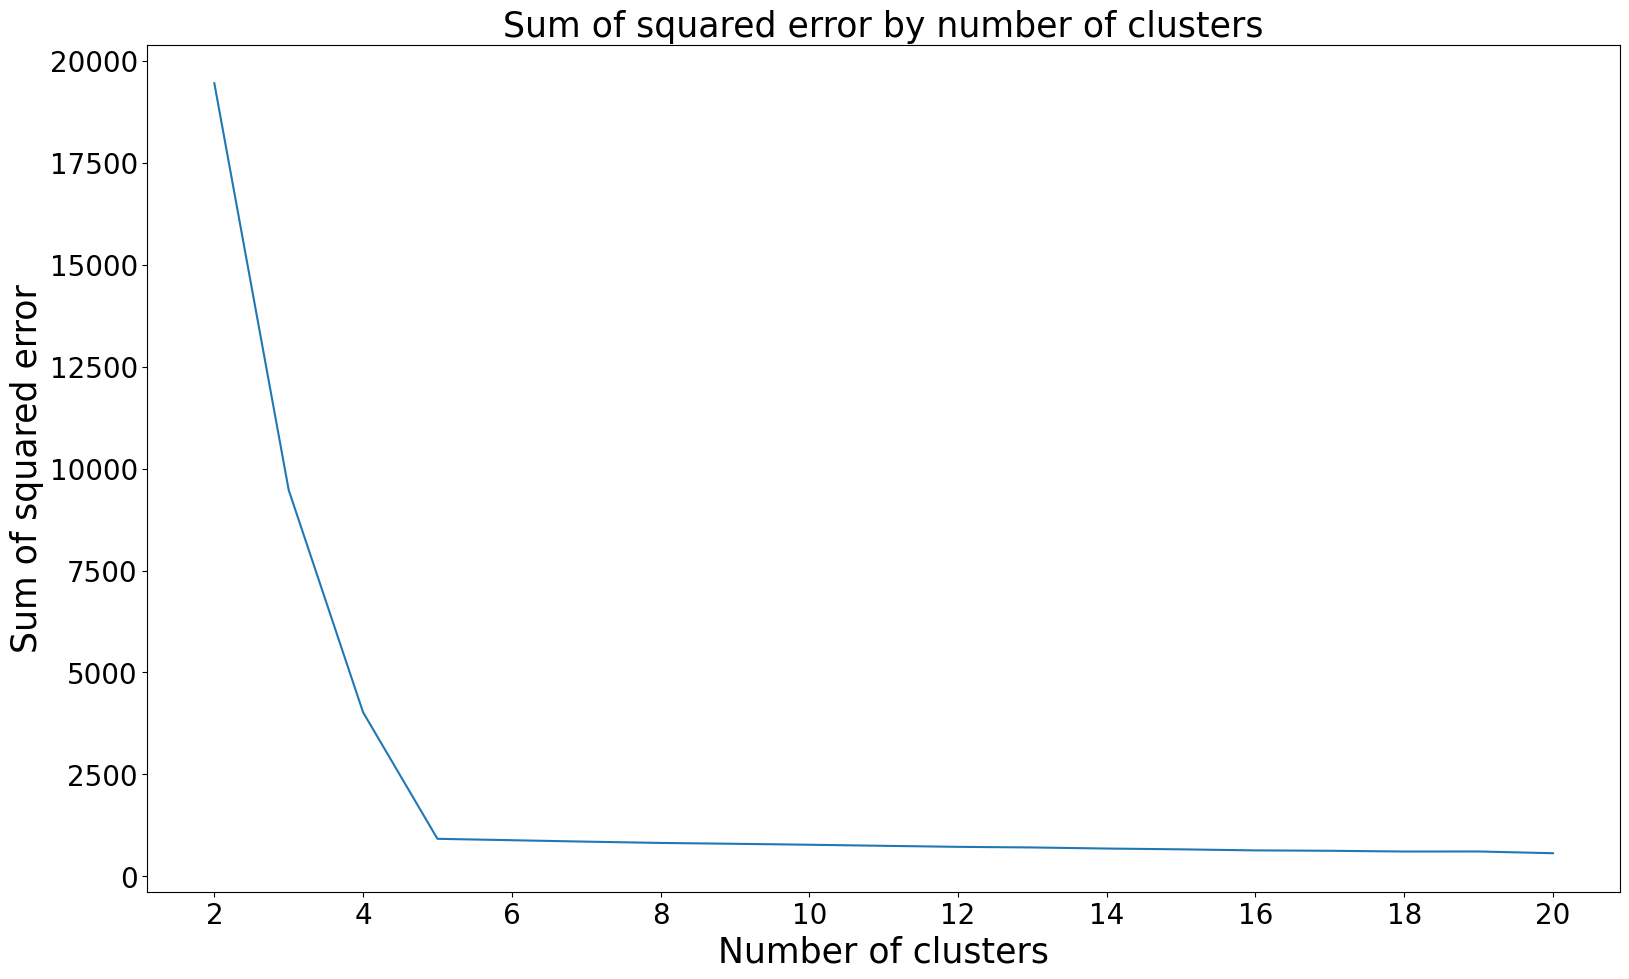

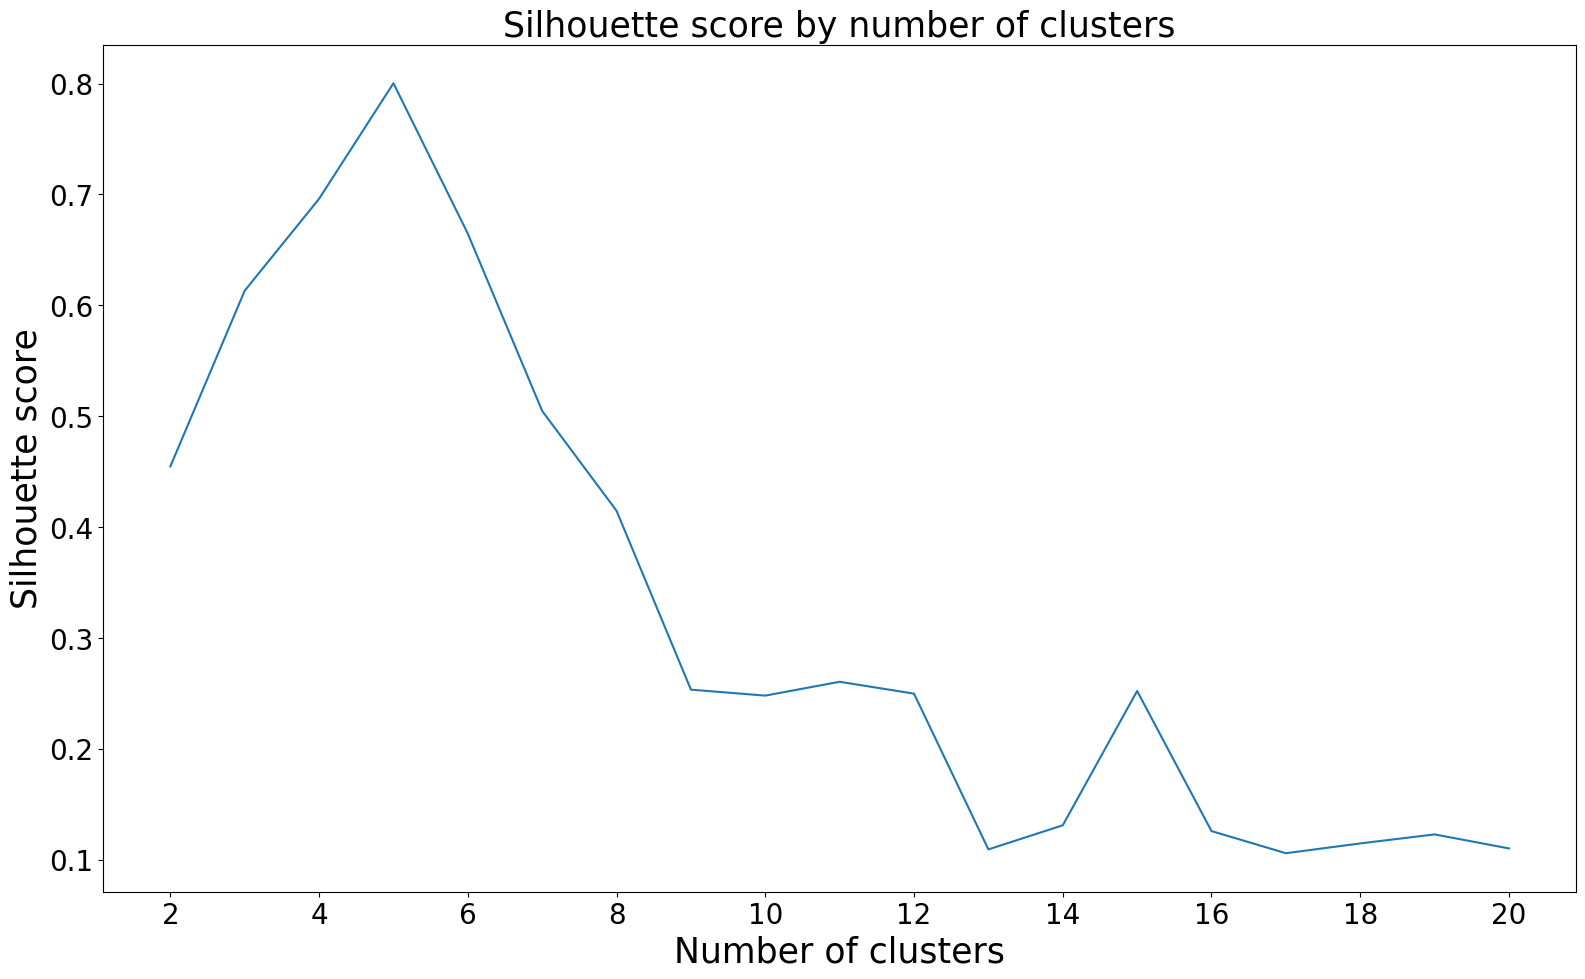

In [129]:
# Plot 
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
kmax = 20; # maximum number of clusters
ax.plot(range(2, kmax + 1), wcss(X10, kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Sum of squared error", fontsize = 25);
ax.set_title("Sum of squared error by number of clusters", fontsize = 25);
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # to force intergers in x-axis
plt.show();

# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
ax.plot(range(2,kmax+1) , Silhouette(X10,kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Silhouette score", fontsize = 25);
ax.set_title("Silhouette score by number of clusters", fontsize = 25);
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # to force intergers in x-axis
plt.show();

# The elbow point is clearly identified at K=5
# The silhouette score strongly favours K=5
# If we increase the number of features, the probability of infering correctly the number of
# clusters increases.

### Question 2 (c)

In [104]:
# The increase in the number of features with relevant information about the cluster structure
# seems to help to identify the true number of clusters.

### Question 2 (d)

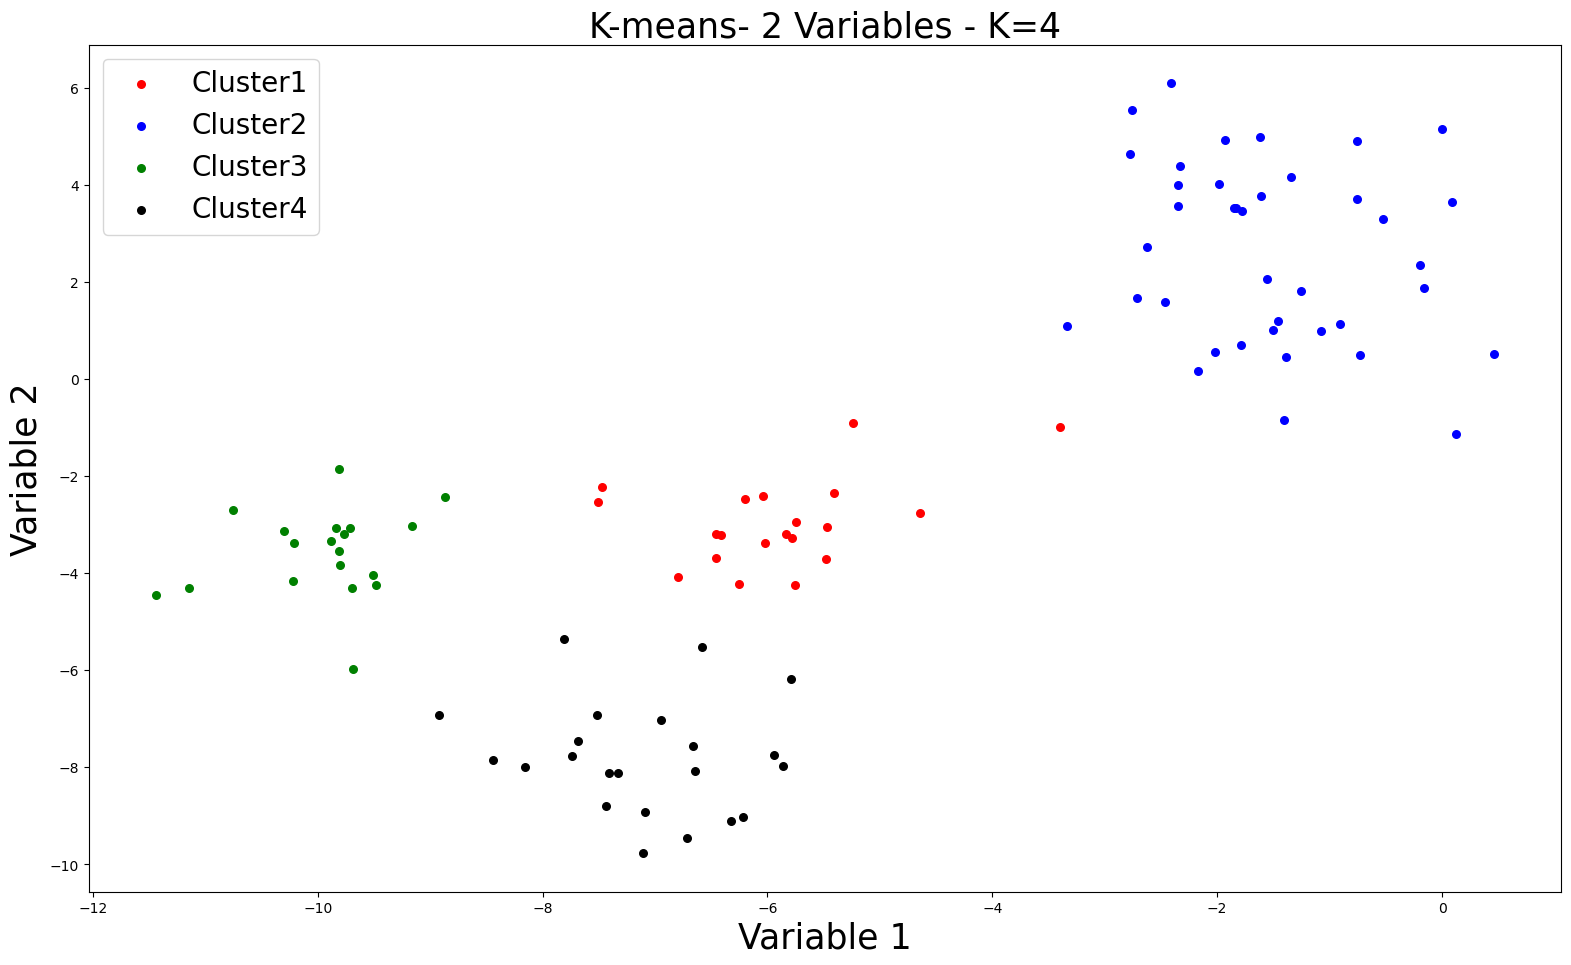

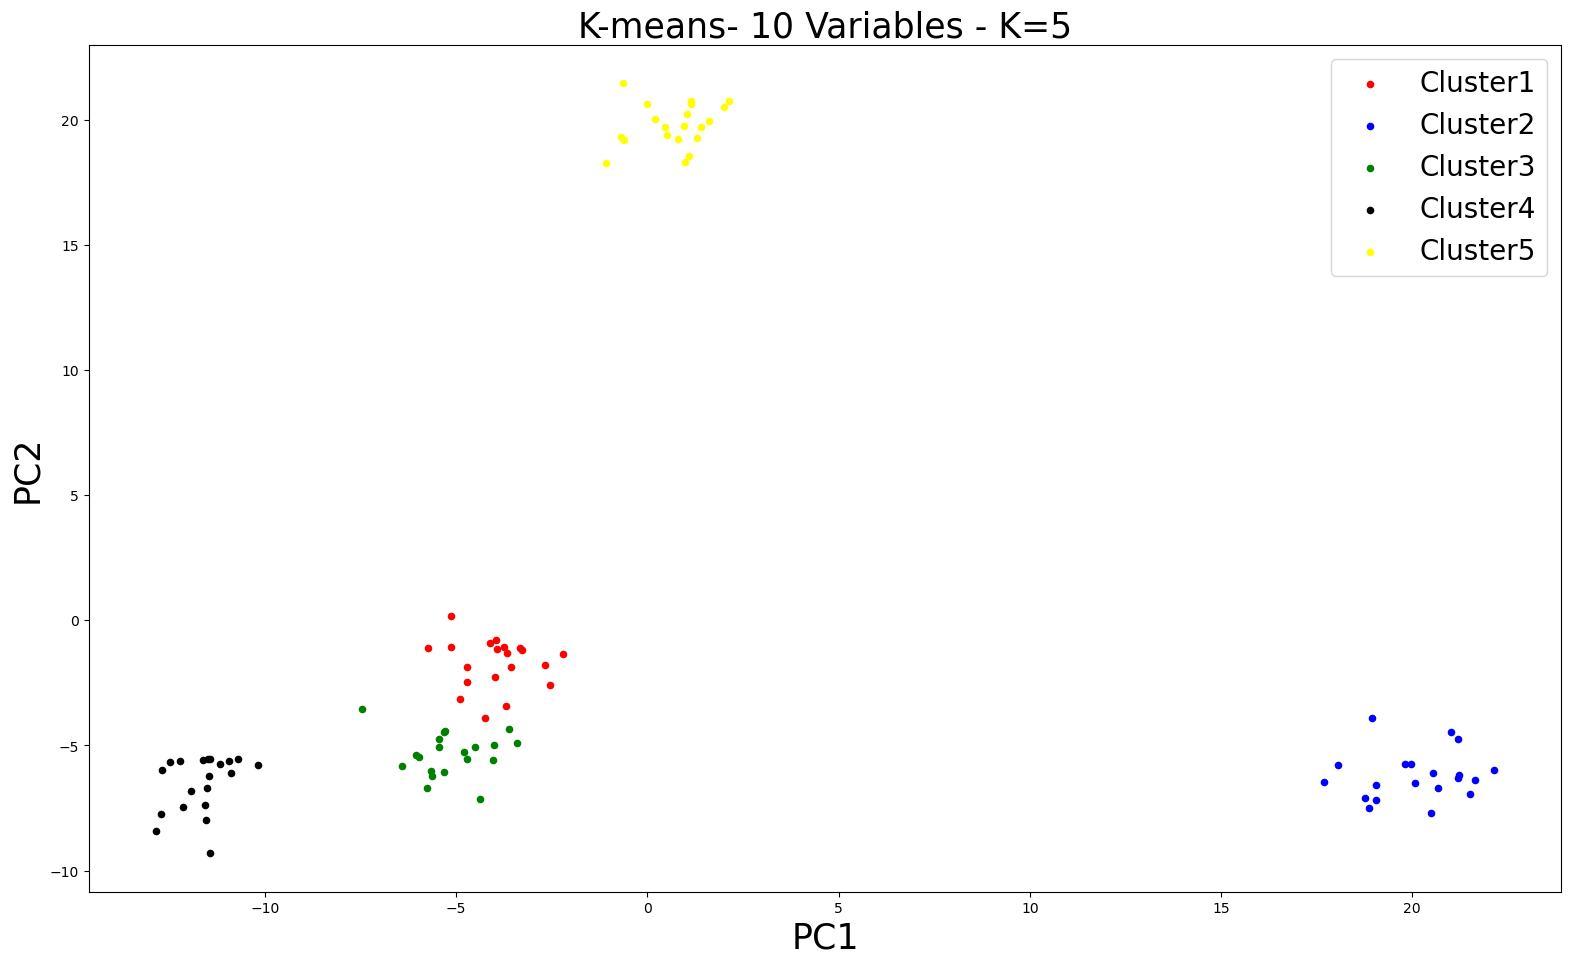

In [132]:
### For the case we have 2 features, we proposed K=4 ###

kmeans2  = KMeans(n_clusters = 4, init = "k-means++", random_state = 42);
y_kmeans2 = kmeans2.fit_predict(X2);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 1], s=30, c="red", label = "Cluster1");
plt.scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 1], s=30, c="blue", label = "Cluster2");
plt.scatter(X2[y_kmeans2 == 2, 0], X2[y_kmeans2 == 2, 1], s=30, c="green", label = "Cluster3");
plt.scatter(X2[y_kmeans2 == 3, 0], X2[y_kmeans2 == 3, 1], s=30, c="black", label = "Cluster4");
plt.xlabel("Variable 1", fontsize = 25);
plt.ylabel("Variable 2", fontsize = 25);
ax.set_title("K-means- 2 Variables - K=4", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

### For the case we have 10 features, we proposed K=5 ###

kmeans10 = KMeans(n_clusters = 5, init = "k-means++", random_state = 42);
y_kmeans10 = kmeans10.fit_predict(X10);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_kmeans10 == 0, 0], PCs.iloc[y_kmeans10 == 0, 1], s=20, c="red", label = "Cluster1");
plt.scatter(PCs.iloc[y_kmeans10 == 1, 0], PCs.iloc[y_kmeans10 == 1, 1], s=20, c="blue", label = "Cluster2");
plt.scatter(PCs.iloc[y_kmeans10 == 2, 0], PCs.iloc[y_kmeans10 == 2, 1], s=20, c="green", label = "Cluster3");
plt.scatter(PCs.iloc[y_kmeans10 == 3, 0], PCs.iloc[y_kmeans10 == 3, 1], s=20, c="black", label = "Cluster4");
plt.scatter(PCs.iloc[y_kmeans10 == 4, 0], PCs.iloc[y_kmeans10 == 4, 1], s=20, c="yellow", label = "Cluster5");
plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("K-means- 10 Variables - K=5", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

# The clusters are well defined in both cases, but better defined for the case of 10 features.
